# Airbnb Price Predictor

In [1]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from portion_of_na import portion_of_na
%matplotlib inline

In [2]:
#read in listing csvs
boston_listings = pd.read_csv("BostonData/listings.csv")
seattle_listings = pd.read_csv("SeattleData/listings.csv")
#change pandas printing settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


## Data Understanding

In [3]:
print(boston_listings.head())
print(seattle_listings.head())

86241   
2    MA   02131  Boston     Boston, MA           US  United States  42.292438   
3    MA     NaN  Boston     Boston, MA           US  United States  42.281106   
4    MA   02131  Boston     Boston, MA           US  United States  42.284512   

   longitude is_location_exact property_type        room_type  accommodates  \
0 -71.133068                 t         House  Entire home/apt             4   
1 -71.134374                 t     Apartment     Private room             2   
2 -71.135765                 t     Apartment     Private room             2   
3 -71.121021                 f         House     Private room             4   
4 -71.136258                 t         House     Private room             2   

   bathrooms  bedrooms  beds  bed_type  \
0        1.5       2.0   3.0  Real Bed   
1        1.0       1.0   1.0  Real Bed   
2        1.0       1.0   1.0  Real Bed   
3        1.0       1.0   2.0  Real Bed   
4        1.5       1.0   2.0  Real Bed   

                   

Seems as though this is a pretty extensive dataframe, 92 columns is a lot.

In [4]:
print(boston_listings.columns)
print(seattle_listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

both data frames have the same columns

In [5]:
print(boston_listings.dtypes)
print("\n\n")
print(seattle_listings.dtypes)

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [6]:
#check out how much of each column is missing

printna = lambda col : print(col.name + ":  " + str(portion_of_na(col)))
print("\nboston_listings\n")
boston_listings.apply(printna)
print("\nseattle_listings\n")
seattle_listings.apply(printna)
print("all done")


boston_listings

id:  0.0
listing_url:  0.0
scrape_id:  0.0
last_scraped:  0.0
name:  0.0
summary:  0.039888423988842396
space:  0.29483960948396093
description:  0.0
experiences_offered:  0.0
neighborhood_overview:  0.3947001394700139
notes:  0.5509065550906556
transit:  0.3598326359832636
access:  0.41534170153417016
interaction:  0.43347280334728033
house_rules:  0.33249651324965135
thumbnail_url:  0.16708507670850767
medium_url:  0.16708507670850767
picture_url:  0.0
xl_picture_url:  0.16708507670850767
host_id:  0.0
host_url:  0.0
host_name:  0.0
host_since:  0.0
host_location:  0.0030683403068340305
host_about:  0.36513249651324964
host_response_time:  0.13138075313807532
host_response_rate:  0.13138075313807532
host_acceptance_rate:  0.13138075313807532
host_is_superhost:  0.0
host_thumbnail_url:  0.0
host_picture_url:  0.0
host_neighbourhood:  0.09456066945606695
host_listings_count:  0.0
host_total_listings_count:  0.0
host_verifications:  0.0
host_has_profile_pic:  0.0
host_

Seems like we have alot of columns that are all or mostly missing in both, like license, square_feet, and security deposit. We will make sure to drop those later with a special function.

In [7]:
#conactenate the dataframes
combined_listings = pd.concat([boston_listings,seattle_listings], axis = 0 , join = "inner" )

In [8]:
combined_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...",https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1.0,1.0,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84

# Getting rid of useless data

From observation, these columns contain long strings that arent really useful in telling us much, so we are going to drop them.

In [9]:
dropped_combined_listings = combined_listings.drop(columns = ["id","listing_url","scrape_id",'name', 'summary',
       'space', 'description','experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name','host_about','host_thumbnail_url', 'host_picture_url','neighbourhood', 'neighbourhood_group_cleansed',
       'zipcode', 'market',"smart_location",'country_code', 'country',"calendar_updated",'calendar_last_scraped', 'first_review', 'last_review',"license",'jurisdiction_names', 'is_location_exact','weekly_price',"monthly_price","security_deposit",'last_scraped','host_since','street','neighbourhood_cleansed','instant_bookable','require_guest_profile_picture','require_guest_profile_picture','requires_license','host_verifications','host_identity_verified','host_has_profile_pic','host_total_listings_count',	'host_location','require_guest_phone_verification','cancellation_policy','extra_people','cleaning_fee','amenities',"guests_included",'number_of_reviews',
       'first_review', 'last_review',  'requires_license','host_is_superhost','reviews_per_month','has_availability','accommodates','host_listings_count','calculated_host_listings_count'])

In [10]:
dropped_combined_listings.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_neighbourhood', 'city', 'state', 'latitude', 'longitude',
       'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'square_feet', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [11]:

#create lambda function that drops columns if they have over half n/a values

thresh = lambda col :  dropped_combined_listings.drop(columns = [col.name] , inplace= True, axis = 1) if portion_of_na(col) > 0.5 else None
#try to catch index error
try:
    dropped_combined_listings.apply(func = thresh, axis = 0)
except IndexError:
    pass
#dropped_combined_listings.shape

In [12]:
dropped_combined_listings.shape
#three rows are dropped

(7403, 28)

In [13]:
#drop any rows where we dont have a price
dropped_combined_listings = dropped_combined_listings.dropna(subset = ['price'], axis = 0)
#remove dollar signs and commas from price
dropped_combined_listings.price = dropped_combined_listings.price.replace({"\$":'',",":''},regex= True)
#convert prices from object to float type
dropped_combined_listings.price = dropped_combined_listings.price.astype('float')

# Impute values in numerical columns using the mean

In [14]:
#divide the values into numerical and categorical columns
numerical_cols = dropped_combined_listings.select_dtypes(exclude="object")
categorical_cols = dropped_combined_listings.select_dtypes(include="object")

#impute mean numerical values for the numerical column

imputer =  lambda col : col.fillna(col.mean())
numerical_cols.apply(imputer)


,latitude,longitude,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,42.282619,-71.133068,1.5,2.0,3.0,250.0,2,1125,0,0,0,0,93.316002,9.540865,9.417229,9.721181,9.733569,9.518056,9.319777
1,42.286241,-71.134374,1.0,1.0,1.0,65.0,2,15,26,54,84,359,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000
2,42.292438,-71.135765,1.0,1.0,1.0,65.0,3,45,19,46,61,319,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000
3,42.281106,-71.121021,1.0,1.0,2.0,75.0,1,1125,6,16,26,98,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
4,42.284512,-71.136258,1.5,1.0,2.0,79.0,2,31,13,34,59,334,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,47.664295,-122.359170,2.0,3.0,3.0,359.0,3,1125,18,32,32,32,80.000000,8.000000,10.000000,4.000000,8.000000,10.000000,8.000000
3814,47.649552,-122.318309,1.0,1.0,2.0,79.0,2,29,6,26,44,273,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
3815,47.508453,-122.240607,1.0,1.0,1.0,93.0,1,7,29,59,88,88,93.316002,9.540865,9.417229,9.721181,9.733569,9.518056,9.319777
3816,47.632335,-122.275530,1.0,0.0,1.0,99.0,3,1125,30,60,90,179,93.316002,9.540865,9.417229,9.721181,9.733569,9.518056,9.319777


# Correlation of numerical features

<AxesSubplot:>

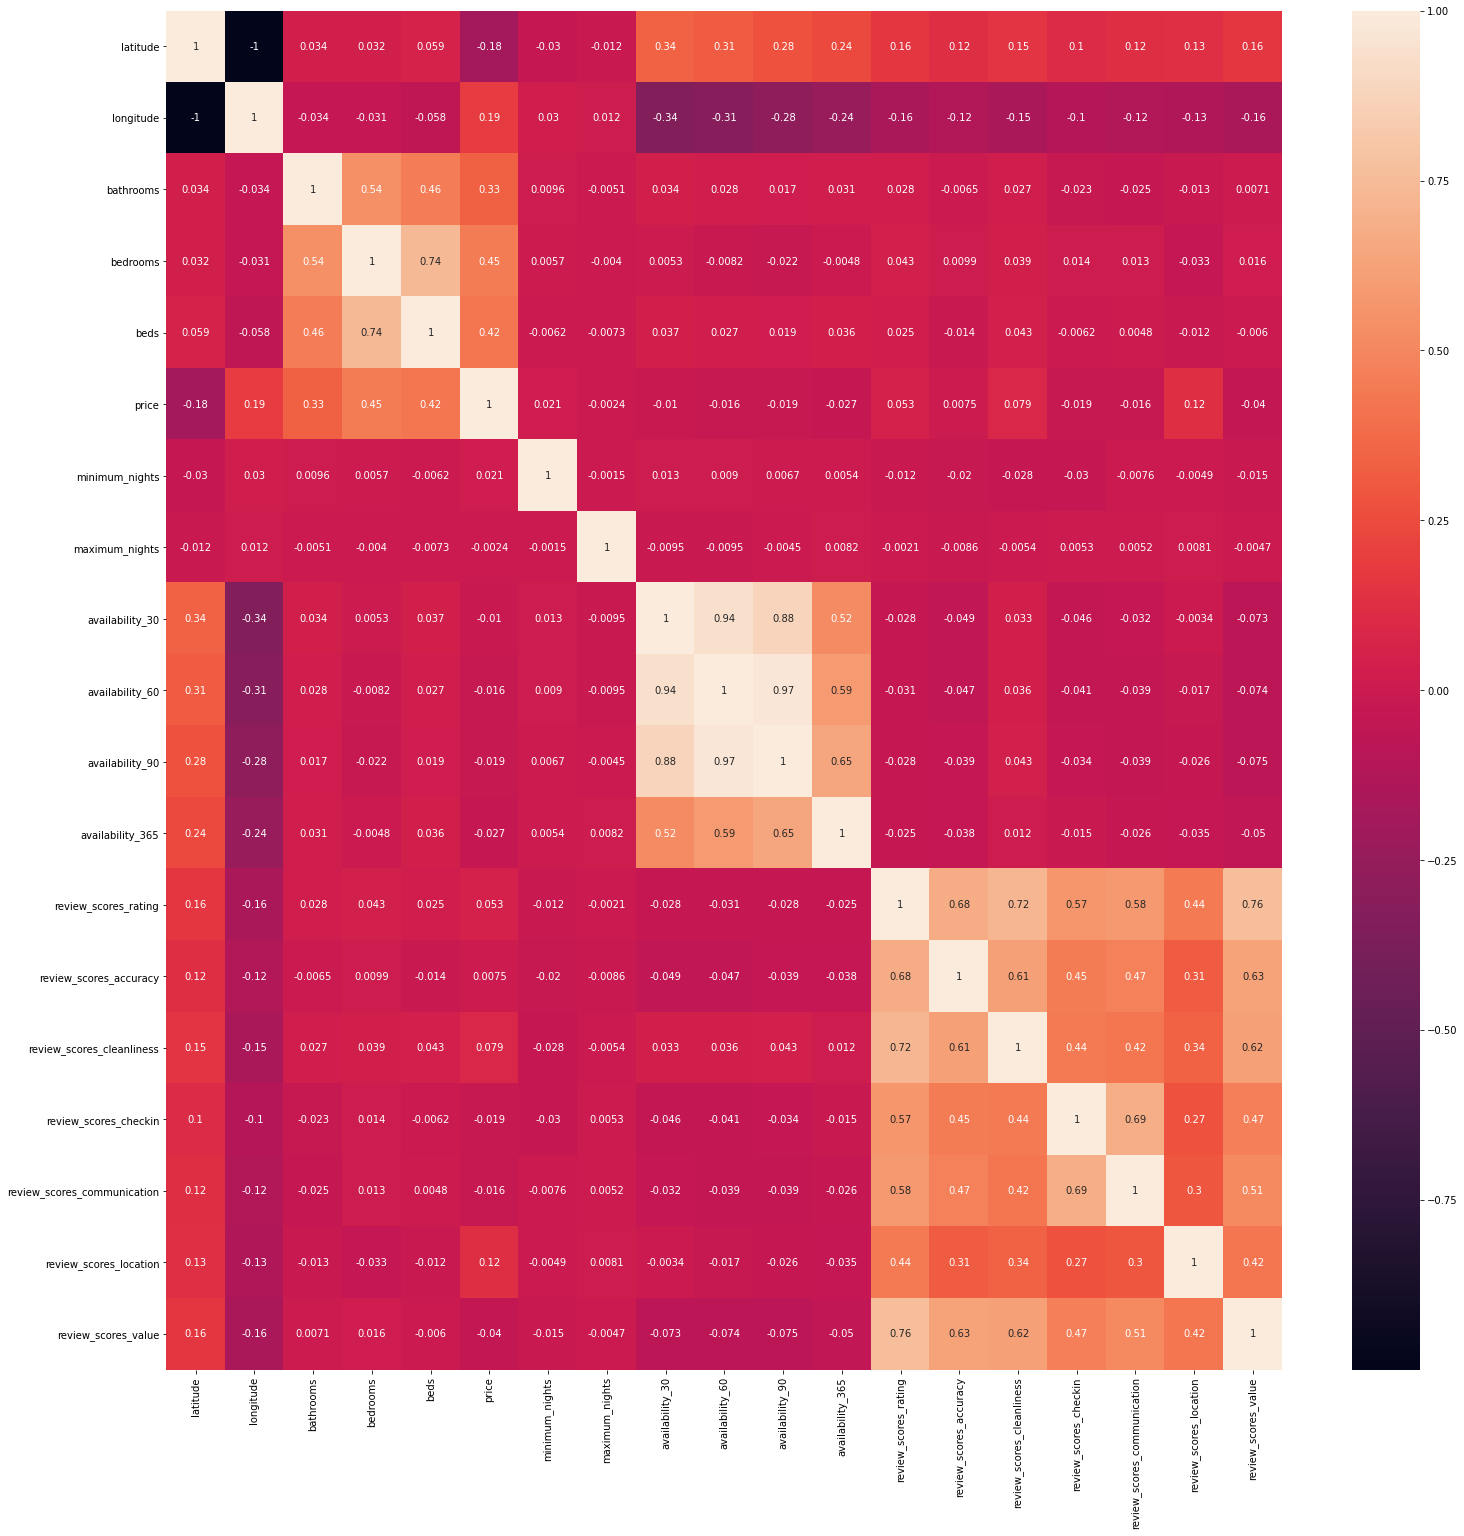

In [15]:
#look at correlation matrix to see which values correleate the most with price
corrmatrix = numerical_cols.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(corrmatrix,annot=True,ax= ax)

# One hot encode categorical variables

In [16]:
categorical_cols = pd.get_dummies(categorical_cols,dummy_na=False)


In [17]:
categorical_cols

,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_0%,host_response_rate_10%,host_response_rate_100%,host_response_rate_14%,host_response_rate_17%,host_response_rate_19%,host_response_rate_20%,host_response_rate_25%,host_response_rate_30%,host_response_rate_31%,host_response_rate_33%,host_response_rate_36%,host_response_rate_38%,host_response_rate_40%,host_response_rate_43%,host_response_rate_50%,host_response_rate_53%,host_response_rate_55%,host_response_rate_56%,host_response_rate_57%,host_response_rate_58%,host_response_rate_6%,host_response_rate_60%,host_response_rate_61%,host_response_rate_63%,host_response_rate_64%,host_response_rate_65%,host_response_rate_67%,host_response_rate_68%,host_response_rate_69%,host_response_rate_70%,host_response_rate_71%,host_response_rate_73%,host_response_rate_75%,host_response_rate_76%,host_response_rate_77%,host_response_rate_78%,host_response_rate_79%,host_response_rate_80%,host_response_rate_81%,host_response_rate_82%,host_response_rate_83%,host_response_rate_84%,host_response_rate_85%,host_response_rate_86%,host_response_rate_87%,host_response_rate_88%,host_response_rate_89%,host_response_rate_90%,host_response_rate_91%,host_response_rate_92%,host_response_rate_93%,host_response_rate_94%,host_response_rate_95%,host_response_rate_96%,host_response_rate_97%,host_response_rate_98%,host_response_rate_99%,host_acceptance_rate_0%,host_acceptance_rate_100%,host_acceptance_rate_17%,host_acceptance_rate_18%,host_acceptance_rate_19%,host_acceptance_rate_20%,host_acceptance_rate_23%,host_acceptance_rate_25%,host_acceptance_rate_28%,host_acceptance_rate_29%,host_acceptance_rate_30%,host_acceptance_rate_33%,host_acceptance_rate_36%,host_acceptance_rate_38%,host_acceptance_rate_40%,host_acceptance_rate_42%,host_acceptance_rate_43%,host_acceptance_rate_44%,host_acceptance_rate_45%,host_acceptance_rate_46%,host_acceptance_rate_47%,host_acceptance_rate_48%,host_acceptance_rate_50%,host_acceptance_rate_51%,host_acceptance_rate_52%,host_acceptance_rate_53%,host_acceptance_rate_54%,host_acceptance_rate_55%,host_acceptance_rate_56%,host_acceptance_rate_57%,host_acceptance_rate_58%,host_acceptance_rate_59%,host_acceptance_rate_60%,host_acceptance_rate_61%,host_acceptance_rate_62%,host_acceptance_rate_63%,host_acceptance_rate_64%,host_acceptance_rate_65%,host_acceptance_rate_66%,host_acceptance_rate_67%,host_acceptance_rate_68%,host_acceptance_rate_69%,host_acceptance_rate_70%,host_acceptance_rate_71%,host_acceptance_rate_72%,host_acceptance_rate_73%,host_acceptance_rate_74%,host_acceptance_rate_75%,host_acceptance_rate_76%,host_acceptance_rate_77%,host_acceptance_rate_78%,host_acceptance_rate_79%,host_acceptance_rate_80%,host_acceptance_rate_81%,host_acceptance_rate_82%,host_acceptance_rate_83%,host_acceptance_rate_84%,host_acceptance_rate_85%,host_acceptance_rate_86%,host_acceptance_rate_87%,host_acceptance_rate_88%,host_acceptance_rate_89%,host_acceptance_rate_90%,host_acceptance_rate_91%,host_acceptance_rate_92%,host_acceptance_rate_93%,host_acceptance_rate_94%,host_acceptance_rate_95%,host_acceptance_rate_96%,host_acceptance_rate_97%,host_acceptance_rate_98%,host_acceptance_rate_99%,host_neighbourhood_Alki,host_neighbourhood_Allston-Brighton,host_neighbourhood_Anaheim,host_neighbourhood_Arbor Heights,host_neighbourhood_Atlantic,host_neighbourhood_Back Bay,host_neighbourhood_Baldwin Hills,host_neighbourhood_Ballard,host_neighbourhood_Beacon Hill,host_neighbourhood_Belltown,host_neighbourhood_Belváros,host_neighbourhood_Benton Park,host_neighbourhood_Bernal Heights,host_neighbourhood_Beverly Hills,host_neighbourhood_Bitter Lake,host_neighbourhood_Brighton,host_neighbourhood_Broadview,host_neighbourhood_Broadway,host_neighbourhood_Brookline,host_neighbourhood_Bryant,host_neighbourhood_Cambridge,host_neighbourhood_Capitol Hill,host_neighbourhood_Cedar Park,host_neighbourhood_Central Business Distr

# Prep for training

In [18]:
#seperate y
combined = pd.concat([numerical_cols,categorical_cols], axis = 1)
combined.dropna(inplace=True)
y = combined.price
#combine numerical and categorical colums
X = combined.drop(columns = ['price'], axis = 1)
X.head()

,latitude,longitude,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_0%,host_response_rate_10%,host_response_rate_100%,host_response_rate_14%,host_response_rate_17%,host_response_rate_19%,host_response_rate_20%,host_response_rate_25%,host_response_rate_30%,host_response_rate_31%,host_response_rate_33%,host_response_rate_36%,host_response_rate_38%,host_response_rate_40%,host_response_rate_43%,host_response_rate_50%,host_response_rate_53%,host_response_rate_55%,host_response_rate_56%,host_response_rate_57%,host_response_rate_58%,host_response_rate_6%,host_response_rate_60%,host_response_rate_61%,host_response_rate_63%,host_response_rate_64%,host_response_rate_65%,host_response_rate_67%,host_response_rate_68%,host_response_rate_69%,host_response_rate_70%,host_response_rate_71%,host_response_rate_73%,host_response_rate_75%,host_response_rate_76%,host_response_rate_77%,host_response_rate_78%,host_response_rate_79%,host_response_rate_80%,host_response_rate_81%,host_response_rate_82%,host_response_rate_83%,host_response_rate_84%,host_response_rate_85%,host_response_rate_86%,host_response_rate_87%,host_response_rate_88%,host_response_rate_89%,host_response_rate_90%,host_response_rate_91%,host_response_rate_92%,host_response_rate_93%,host_response_rate_94%,host_response_rate_95%,host_response_rate_96%,host_response_rate_97%,host_response_rate_98%,host_response_rate_99%,host_acceptance_rate_0%,host_acceptance_rate_100%,host_acceptance_rate_17%,host_acceptance_rate_18%,host_acceptance_rate_19%,host_acceptance_rate_20%,host_acceptance_rate_23%,host_acceptance_rate_25%,host_acceptance_rate_28%,host_acceptance_rate_29%,host_acceptance_rate_30%,host_acceptance_rate_33%,host_acceptance_rate_36%,host_acceptance_rate_38%,host_acceptance_rate_40%,host_acceptance_rate_42%,host_acceptance_rate_43%,host_acceptance_rate_44%,host_acceptance_rate_45%,host_acceptance_rate_46%,host_acceptance_rate_47%,host_acceptance_rate_48%,host_acceptance_rate_50%,host_acceptance_rate_51%,host_acceptance_rate_52%,host_acceptance_rate_53%,host_acceptance_rate_54%,host_acceptance_rate_55%,host_acceptance_rate_56%,host_acceptance_rate_57%,host_acceptance_rate_58%,host_acceptance_rate_59%,host_acceptance_rate_60%,host_acceptance_rate_61%,host_acceptance_rate_62%,host_acceptance_rate_63%,host_acceptance_rate_64%,host_acceptance_rate_65%,host_acceptance_rate_66%,host_acceptance_rate_67%,host_acceptance_rate_68%,host_acceptance_rate_69%,host_acceptance_rate_70%,host_acceptance_rate_71%,host_acceptance_rate_72%,host_acceptance_rate_73%,host_acceptance_rate_74%,host_acceptance_rate_75%,host_acceptance_rate_76%,host_acceptance_rate_77%,host_acceptance_rate_78%,host_acceptance_rate_79%,host_acceptance_rate_80%,host_acceptance_rate_81%,host_acceptance_rate_82%,host_acceptance_rate_83%,host_acceptance_rate_84%,host_acceptance_rate_85%,host_acceptance_rate_86%,host_acceptance_rate_87%,host_acceptance_rate_88%,host_acceptance_rate_89%,host_acceptance_rate_90%,host_acceptance_rate_91%,host_acceptance_rate_92%,host_acceptance_rate_93%,host_acceptance_rate_94%,host_acceptance_rate_95%,host_acceptance_rate_96%,host_acceptance_rate_97%,host_acceptance_rate_98%,host_acceptance_rate_99%,host_neighbourhood_Alki,host_neighbourhood_Allston-Brighton,host_neighbourhood_Anaheim,host_neighbourhood_Arbor Heights,host_neighbourhood_Atlantic,host_neighbourhood_Back Bay,host_neighbourhood_Baldwin Hills,host_neighbourhood_Ballard,host_neighbourhood_Beacon Hill,host_neighbourhood_Belltown,host_neighbourhood_Belváros,host_neighbourhood_Benton Park,host_neighbourhood_Bernal Heights,host_neighbourhood_Beverly Hills,ho

In [19]:
#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.1 )


In [20]:
#implement randomforest  model
model = RandomForestRegressor()

In [21]:
#fit the model to our training data
model.fit(X_train,y_train)



RandomForestRegressor()

In [22]:
prediction = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_test,prediction)

In [24]:
error

33.35607142857143

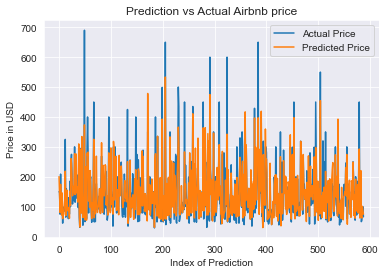

In [71]:
y_test = y_test.reset_index(drop=True)
plot = sns.lineplot(x = y_test.index ,y = y_test.values)
predictions = pd.Series(prediction)
plot.set_title("Prediction vs Actual Airbnb price")
plot.set_xlabel("Index of Prediction")
plot.set_ylabel("Price in USD")
plot = sns.lineplot(x = predictions.index, y = predictions.values)
plt.legend(["Actual Price", 'Predicted Price'])

Seems like our model is doing an OK job at predicting Airbnb prices

# Take a look at feauture importances , what are the greatest price predictors?

In [69]:
#create a dict with corresponding feature names and weights
names = pd.DataFrame(model.feature_importances_, index = X.columns, columns= ["Factor Importance"])
names.index.rename(name = "Factor")
names.sort_values(inplace=True,by = ["Factor Importance"],ascending = False)
best_factors = names[:10]
best_factors.rename({"room_type_Entire home/apt":"room_type"},inplace=True)

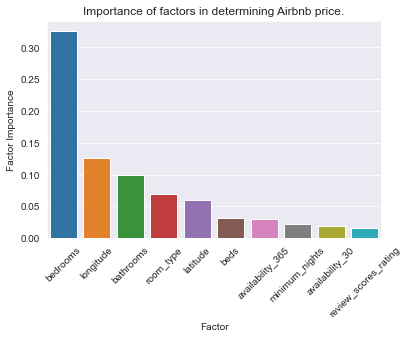

In [70]:
sns.set_style("darkgrid")
plot = sns.barplot(x = best_factors.index, y = best_factors["Factor Importance"])
plot.set_title("Importance of factors in determining Airbnb price.")
plot.set_xlabel("Factor")
plot.tick_params(axis = 'x', labelsize = 10, rotation = 45)


# Conclusion
By looking at our correlation matrix, as well as the feature importance of each feature, it seems that the main determining factors in the price of an AirBNB are number of bedrooms, location, and number of bathrooms. This goes hand in hand with conventional real estate wisdom (think "location location location"). It is important to note that the model was not too accurate, having a mean error of 33$, which is not great. This could be due to having too many feature, or perhaps lacking information, like ameneties